# Candlestick Harami

https://www.investopedia.com/terms/b/bullishharami.asp
https://www.investopedia.com/terms/b/bearishharami.asp


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with Harami

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

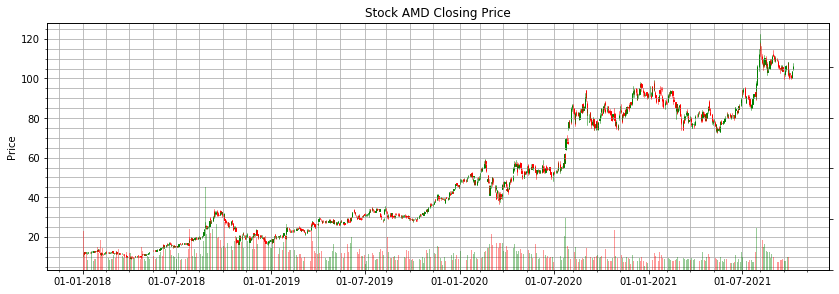

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
harami = talib.CDLHARAMI(df['Open'], df['High'], df['Low'], df['Close'])

harami = harami[harami != 0]

In [6]:
df['harami'] = talib.CDLHARAMI(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['harami'] !=0]

,Open,High,Low,Close,Adj Close,Volume,harami
Date,,,,,,,
2018-02-09,11.540000,11.570000,10.630000,11.310000,11.310000,85458200,100
2018-02-22,11.820000,12.000000,11.630000,11.840000,11.840000,37886300,100
2018-03-15,11.430000,11.550000,11.190000,11.460000,11.460000,66373900,100
2018-03-21,11.160000,11.340000,11.110000,11.260000,11.260000,44691700,100
2018-04-03,9.630000,9.770000,9.300000,9.550000,9.550000,54891600,100
...,...,...,...,...,...,...,...
2021-05-12,75.089996,76.129997,74.160004,74.639999,74.639999,42531400,-100
2021-05-14,74.019997,75.029999,72.720001,74.589996,74.589996,38355800,100
2021-05-24,77.260002,78.010002,76.800003,77.440002,77.440002,33194300,100


In [8]:
df['Adj Close'].loc[df['harami'] !=0]

Date
2018-02-09     11.310000
2018-02-22     11.840000
2018-03-15     11.460000
2018-03-21     11.260000
2018-04-03      9.550000
                 ...    
2021-05-12     74.639999
2021-05-14     74.589996
2021-05-24     77.440002
2021-08-25    108.300003
2021-09-24    105.800003
Name: Adj Close, Length: 64, dtype: float64

In [9]:
df['Adj Close'].loc[df['harami'] !=0].index

DatetimeIndex(['2018-02-09', '2018-02-22', '2018-03-15', '2018-03-21',
               '2018-04-03', '2018-04-16', '2018-04-18', '2018-05-02',
               '2018-05-31', '2018-06-19', '2018-06-22', '2018-06-26',
               '2018-07-16', '2018-08-01', '2018-09-17', '2018-10-22',
               '2018-11-13', '2018-12-18', '2018-12-27', '2019-01-14',
               '2019-01-23', '2019-02-13', '2019-03-15', '2019-04-10',
               '2019-04-18', '2019-05-24', '2019-07-16', '2019-07-25',
               '2019-08-26', '2019-09-12', '2019-09-30', '2019-11-20',
               '2019-12-10', '2020-01-03', '2020-01-13', '2020-03-27',
               '2020-04-22', '2020-05-15', '2020-05-22', '2020-06-01',
               '2020-06-17', '2020-06-29', '2020-07-27', '2020-08-28',
               '2020-09-14', '2020-10-12', '2020-10-22', '2020-11-20',
               '2020-12-01', '2020-12-04', '2020-12-11', '2020-12-24',
               '2020-12-31', '2021-01-19', '2021-02-09', '2021-02-26',
      

In [10]:
harami

Date
2018-02-09    100
2018-02-22    100
2018-03-15    100
2018-03-21    100
2018-04-03    100
             ... 
2021-05-12   -100
2021-05-14    100
2021-05-24    100
2021-08-25    100
2021-09-24   -100
Length: 64, dtype: int32

In [11]:
harami.index

DatetimeIndex(['2018-02-09', '2018-02-22', '2018-03-15', '2018-03-21',
               '2018-04-03', '2018-04-16', '2018-04-18', '2018-05-02',
               '2018-05-31', '2018-06-19', '2018-06-22', '2018-06-26',
               '2018-07-16', '2018-08-01', '2018-09-17', '2018-10-22',
               '2018-11-13', '2018-12-18', '2018-12-27', '2019-01-14',
               '2019-01-23', '2019-02-13', '2019-03-15', '2019-04-10',
               '2019-04-18', '2019-05-24', '2019-07-16', '2019-07-25',
               '2019-08-26', '2019-09-12', '2019-09-30', '2019-11-20',
               '2019-12-10', '2020-01-03', '2020-01-13', '2020-03-27',
               '2020-04-22', '2020-05-15', '2020-05-22', '2020-06-01',
               '2020-06-17', '2020-06-29', '2020-07-27', '2020-08-28',
               '2020-09-14', '2020-10-12', '2020-10-22', '2020-11-20',
               '2020-12-01', '2020-12-04', '2020-12-11', '2020-12-24',
               '2020-12-31', '2021-01-19', '2021-02-09', '2021-02-26',
      

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,harami
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

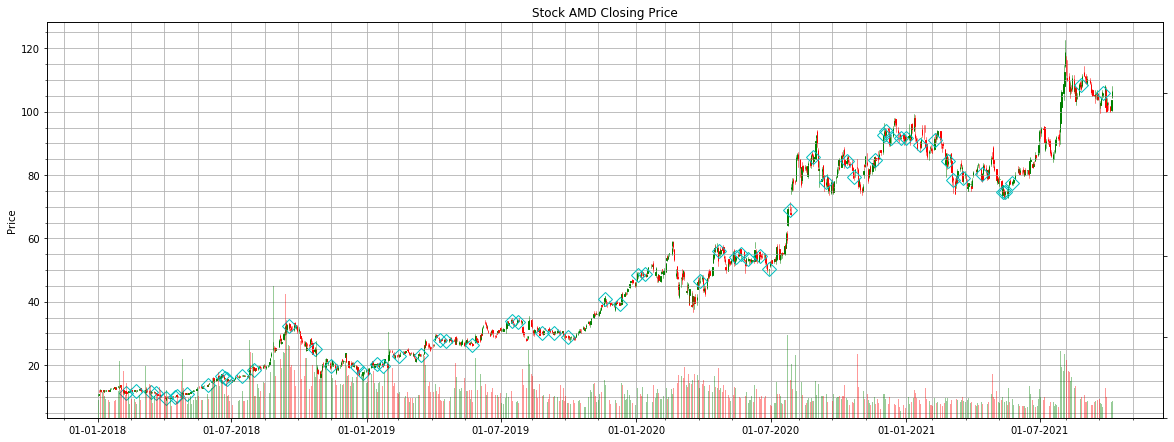

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['harami'] !=0].index, df['Adj Close'].loc[df['harami'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-10-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,harami,VolumePositive
0,738004.0,105.930000,110.330002,103.830002,108.629997,108.629997,115581900,0,True
1,738005.0,108.150002,114.849998,107.660004,112.559998,112.559998,157723100,0,True
2,738006.0,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,0,True
3,738007.0,116.629997,117.680000,111.589996,112.349998,112.349998,137860900,0,False
4,738008.0,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,0,False


Text(0, 0.5, 'Price')

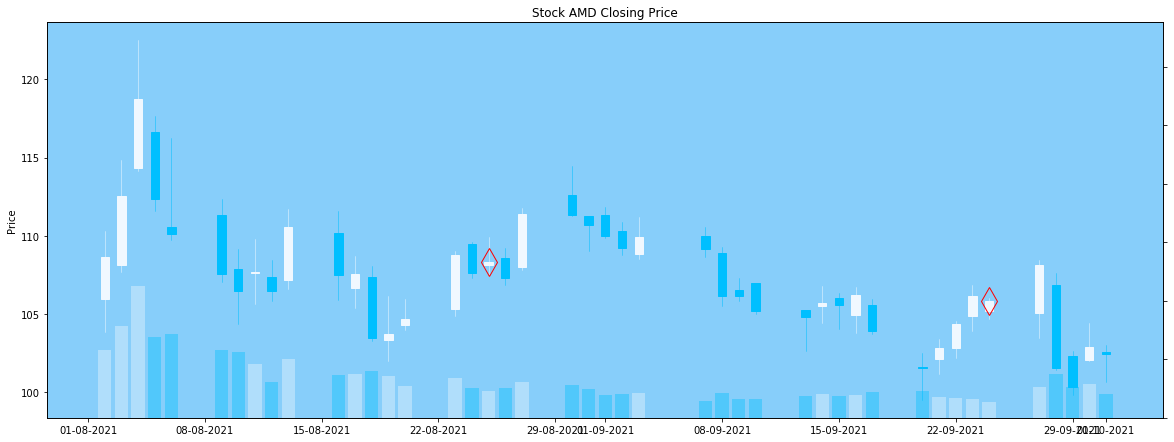

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightskyblue')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='aliceblue', colordown='deepskyblue', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['harami'] !=0].index, df['Adj Close'].loc[df['harami'] !=0],
                'dr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'aliceblue', False: 'deepskyblue'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

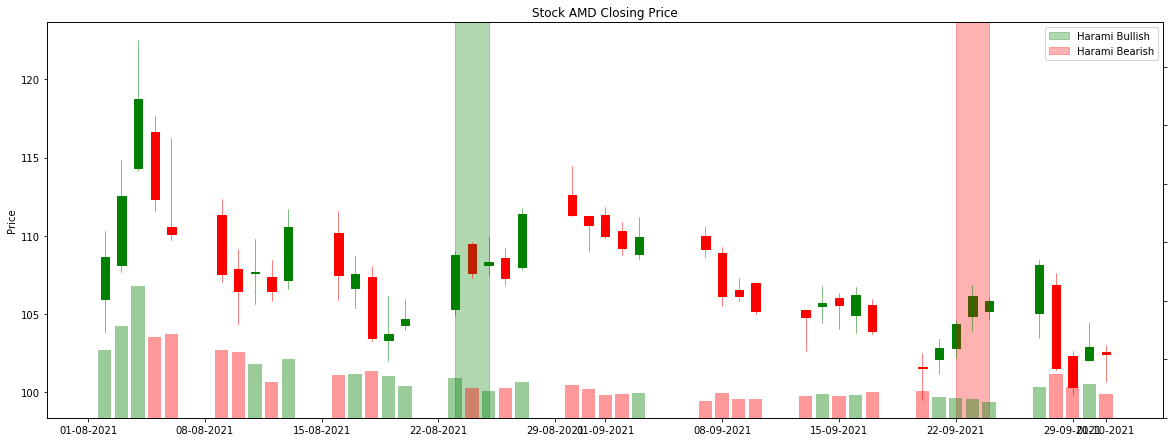

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,23)), date2num(datetime(2021,8,25)), 
           label="Harami Bullish",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2021,9,22)), date2num(datetime(2021,9,24)), 
           label="Harami Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')